In [9]:
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

###############################################################
def initialize_grid_graph(n, H_nodes, G):
    # グラフGにval属性を追加し、グラフHのノードの値を格納
    for x, y in G.nodes():
        if x == 0: # 第0行の場合
            G.nodes[(x, y)]['val'] = H_nodes[y]
        else:
            # x+yが偶数の場合
            if (x + y) % 2 == 0:
                G.nodes[(x,y)]['val'] = G.nodes[(x-1, max(0, y-1))]['val']
            # x+yが奇数の場合
            else:
                G.nodes[(x,y)]['val'] = G.nodes[(x-1, min(n-1,y+1))]['val']

###############################################################
# 格子状レイアウトでグラフを描画
def Show_KingGraph(G):
    # yを横、-xを縦にすることで正しい表現（行, 列）になる
    pos = {(x, y): (y, -x) for x, y in G.nodes()}

    # ノードラベルを設定
    # labels = {(x, y): f"({x},{y})" for x, y in G.nodes()}
    labels = {(x, y): f"({x},{y})\n{G.nodes[(x, y)]['val']}" for x, y in G.nodes()}

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1200, node_color='skyblue', font_size=12, font_color='black')
    plt.title('King graph')
    plt.show()

###############################################################
# Here Here Here Here Here Here
def minimize_vertex_group(G_prime, nodes):
    max_d = 100 # グラフGの最大距離（適当）
    distances = defaultdict(lambda: int('inf'))
    for d in range(1, max_d):
        for v in nodes:
            for u in G_prime:
                if nx.shortest_path_length(G_prime, source=u, target=v) == d:
                    distances[u] = d
        if all(distances[u] < int('inf') for u in G_prime):
            v_star = min(distances, key=distances.get)
            break

    xi = {v_star}
    for v in nodes:
        shortest_path = nx.shortest_path(G_prime, source=v_star, target=v)
        xi.update(shortest_path)
        
    return list(xi)

###############################################################
def CGME(H):
    n = H.number_of_nodes()   # グラフHのノード数
    H_nodes = list(H.nodes()) # グラフHのノードリスト

    # (n-1)xn の格子グラフG
    G = nx.grid_2d_graph(n-1, n)

    # グラフGの初期化
    initialize_grid_graph(n, H_nodes, G)
    
    phi = defaultdict(set)

    # 初期化ステップで、同じ val 値を持つノードからなるノード集合を phi とする
    for (x, y), data in G.nodes(data=True):
        val = data['val']
        phi[val].add((x, y))
    
    stopping_criterion_met = False
    # メインループ
    while not stopping_criterion_met:
        for vi in H.nodes:
            phi[vi] = set()
            for vj in H.neighbors(vi):
                phi[vj] = minimize_vertex_group(phi[vj], set(H.neighbors(vj)) - {vi})
            phi[vi] = minimize_vertex_group(set(G.nodes) - set.union(*phi.values()), set(G.neighbors(vi)))
            
        # Update the stopping criterion as needed
        # For example, if there's no change in phi, or after a fixed number of iterations
        stopping_criterion_met = True  # Placeholder to break the loop

    return phi

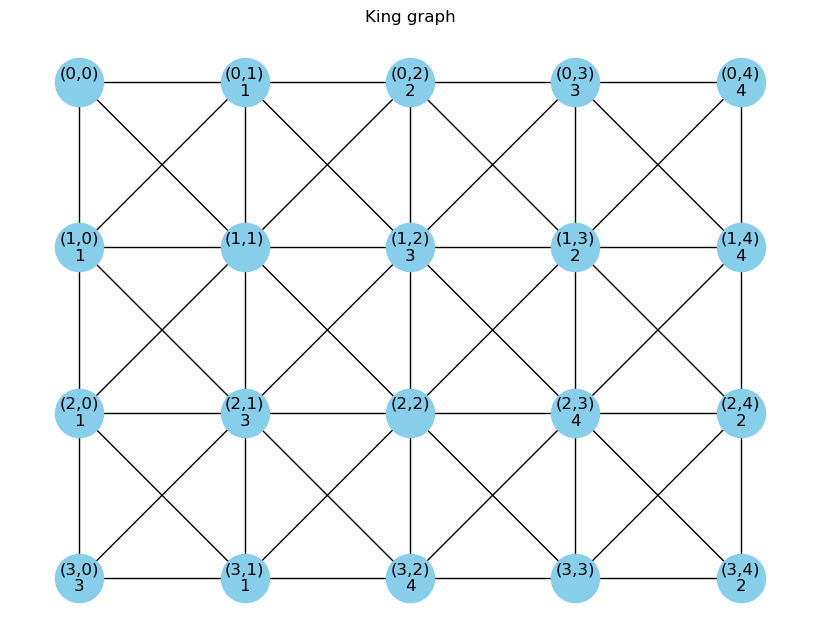

In [10]:
# main文に相当する部分

import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

###############################################################
# 論文の図4(a)のグラフ

H = nx.Graph()  # 無向グラフ (Undirected Graph)

# ノードの追加
H.add_nodes_from([0, 1, 2, 3, 4])

# エッジの追加
H.add_edges_from([(0,1), (0,2), (0,4), (1,2), (2,3), (2,4), (3,4)])

n = H.number_of_nodes()   # グラフHのノード数
H_nodes = list(H.nodes()) # グラフHのノードリスト

###############################################################
# (n-1)xn のキンググラフG
G = nx.grid_2d_graph(n-1, n)

# 斜め方向のエッジを追加
for x, y in G.nodes():
    if (x+1, y+1) in G.nodes():
        G.add_edge((x, y), (x+1, y+1))
    if (x+1, y-1) in G.nodes():
        G.add_edge((x, y), (x+1, y-1))

# グラフGの初期化
initialize_grid_graph(n, H_nodes, G)
# Show_KingGraph(G)

# 同一の val 値を持つノードを返す関数を定義
def get_nodes_with_val(G, val):
    return [node for node, data in G.nodes(data=True) if data.get('val') == val]

# ノードの val 値を変更する関数を定義
def set_node_val(G, node, new_val):
    if node in G.nodes():
        G.nodes[node]['val'] = new_val
#        print(f"Node {node} val updated to {new_val}")
    else:
        print(f"Node {node} not found in graph G")

for node in get_nodes_with_val(G, H_nodes[0]):
    set_node_val(G, node, '')

Show_KingGraph(G)

# phi = defaultdict(set)

# # 初期化ステップで、同じ val 値を持つノードからなるノード集合を phi とする
# for (x, y), data in G.nodes(data=True):
#     val = data['val']
#     phi[val].add((x, y))

# vi = 0
# phi[vi] = set()
# for vj in H.neighbors(vi):
#     G_prime = set(H.neighbors(vj)) - {vi}
#     print(vj, ": ", G_prime, ": ", phi[vj])
#     for v in phi[vj]:
#         d = 1
#         for u in G_prime:
#             print(u)
#             # print(nx.shortest_path_length(G_prime, source=u, target=v))
#     # print(minimize_vertex_group(phi[vj], set(H.neighbors(vj)) - {vi}))
# print()
